# Adults Meeting Physical Activity Guidelines in CA

In this data analysis folder, I will use my cleaned data set that I've saved in order to analyze the percentages of adults among different age groups who meet the state's physical activity guidelines and work to make any noteworthy observations from this analysis.

My hope is to find any historical trends or insights that distinguishes the 55-64 age group from the other age groups, so that I can include physical activity as another social/behavioral determinant of mental health. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
activity_df = pd.read_csv('../data/Cleaned/physical_activity_cleaned.csv')

In [3]:
activity_df

,geo,year,category,category_name,percent,lower_cl,upper_cl,Standard Error
0,California,2013,Total population,Total population,69.0782,67.6683,70.4881,0.7192
1,California,2013,Race-Ethnicity,White,75.8986,74.3168,77.4804,0.8069
2,California,2013,Race-Ethnicity,African-American,63.4425,56.9960,69.8891,3.2885
3,California,2013,Race-Ethnicity,Asian/Pacific Islander,61.3377,58.6958,63.9795,1.3477
4,California,2013,Race-Ethnicity,Hispanic,65.7066,60.1734,71.2398,2.8226
...,...,...,...,...,...,...,...,...
64,California,2017,Income,"$50,000 to $74,999",73.3338,66.5754,80.0922,3.4473
65,California,2017,Income,"$75,000 to $99,999",77.9233,70.4109,85.4357,3.8319
66,California,2017,Income,"$100,000 and above",85.7647,82.3292,89.2002,1.7523
67,California,2017,Sex,Male,71.7643,67.5703,75.9583,2.1393


In [4]:
activity_df.sample(15)

,geo,year,category,category_name,percent,lower_cl,upper_cl,Standard Error
61,California,2017,Income,"Less than $20,000",60.0387,53.2332,66.8442,3.4713
25,California,2015,Race-Ethnicity,African-American,74.3893,67.5797,81.1988,3.4737
37,California,2015,Education,College graduate,81.4838,78.7249,84.2428,1.4074
26,California,2015,Race-Ethnicity,Asian/Pacific Islander,75.6605,69.8340,81.4870,2.9723
19,California,2013,Income,"$75,000 to $99,999",78.1614,74.1967,82.1261,2.0225
49,California,2017,Race-Ethnicity,Asian/Pacific Islander,70.3930,59.7915,80.9945,5.4077
6,California,2013,Age,18 to 34 years,71.1897,68.0948,74.2846,1.5788
56,California,2017,Age,65 years and above,71.7753,68.1554,75.3952,1.8465
68,California,2017,Sex,Female,69.4562,65.9808,72.9316,1.7728
8,California,2013,Age,45 to 54 years,69.1638,65.9802,72.3475,1.6240


Reminder that this is from my cleaned data set in my data_exploration folder!

We have years starting at 2013 and going to 2017. It will be important for me to once again note that this data only has information from 3 years, 2013, 2015, and 2017.

I know I want to focus on the different age groups, which is what I did for the other potential factors of mental health. Although there are lots of demographic & other categories here, for the purpose of my data story, I will look specifically at any differences among age groups so that this can be another factor I can cite as important in mental health discourse.

### Observations:

* I'm interested in the physical activity levels among different age groups, to see if any of this data can help explain the levels of depression rates among those same age groups that I found earlier.
* There's data from 2013 to 2017; the "percent" column is telling us the percentage of adults meeting physical activity guidelines; right from 2013 we can see that the youngest age group is most active (71.19%) and least active is 35 to 44, but we'll see if there are any notable patterns throughout the years.

Let's go through a basic organization and grouping of the data set, by year, category, category_name, and the percent of individuals meeting physical activity guidelines!

In [5]:
# Using the groupby function to look at specific categories and the physical activity levels:

activity_df.groupby(['year','category','category_name'])['percent'].mean().to_frame()

percent
year category         category_name              
2013 Age              18 to 34 years      71.1897
                      35 to 44 years      64.5594
                      45 to 54 years      69.1638
                      55 to 64 years      70.3753
                      65 years and above  68.7360
...                                           ...
2017 Race-Ethnicity   Other               78.6266
                      White               77.5608
     Sex              Female              69.4562
                      Male                71.7643
     Total population Total population    70.5270

[69 rows x 1 columns]

This is a more organized way of representing our data! The age groups seem to be consistent with those from the original "Adult Depression" indicator, so that's a green light. 

Now, time to look at the age groups:

In [6]:
# Creating a filter for age:

age_filter = activity_df['category'] == 'Age'

age_activity_df = activity_df[age_filter]

age_grouped = age_activity_df.groupby(['year', 'category_name'])['percent'].sum().unstack()

age_grouped

category_name,18 to 34 years,35 to 44 years,45 to 54 years,55 to 64 years,65 years and above
year,,,,,
2013,71.1897,64.5594,69.1638,70.3753,68.7360
2015,72.6642,69.6839,69.2704,72.8096,73.4498
2017,70.4639,73.0860,69.9560,67.0844,71.7753


### Observations:

Interesting!!! 
* First thing to note down is that (good news) all the age groups are reporting pretty high levels of those meeting the activity guidelines. Almost all are more than two-thirds of adults (except one, 35-44 age group in 2013, but even that is at almost 65%).
* 18-34 year age group overall % decreased throughout the years, 35-44 increased, 45-54 didn't change much (very very small increase of about 0.7%), 55-64 decreased the most! and 65+ overall increased % of those meeting physical activity guidelines.
* 55-64 year age group has experienced an overall decrease in physical activity from 2013 to 2017!!! It went from 70.38% in 2013, up 2 percent points in 2015, before dropping to 67.08% in 2017. 

This means that the percentages of people in each age group who meet the recommended physical activity guidelines can serve as a possible explanation that could characterize this age range's high depression rates.

Not sure if a bar plot will help us visualize the data, but let's take a look:

<AxesSubplot:xlabel='year'>

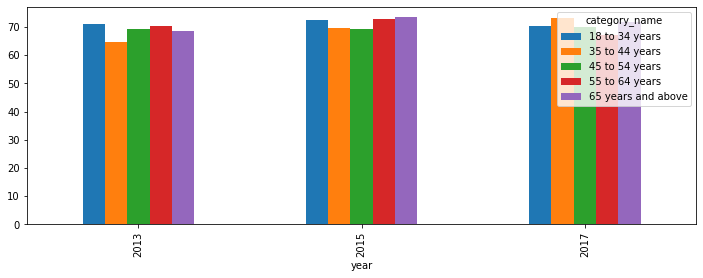

In [7]:
# To see it visually on a plot:

age_grouped.plot(kind='bar', figsize=(12,4))

I think the table does a better job of showing the differences, this plot is just confusing but it's relaying the same message. Overall there aren't drastic changes in the % of adults meeting physical activity guidelines throughout the age groups, but there are certain changes we can observe.

This will not be relevant for my data story, but just out of curiosity I want to look at differences among males and females:

In [8]:
# Creating a filter for sex:

sex_filter = activity_df['category'] == 'Sex'

sex_activity_df = activity_df[sex_filter]

sex_grouped = sex_activity_df.groupby(['year', 'category_name'])['percent'].sum().unstack()

sex_grouped

category_name,Female,Male
year,,
2013,68.1760,70.0242
2015,72.3509,70.8392
2017,69.4562,71.7643


This is sort of what I suspected, that less females than males are meeting the recommended guidelines. But at least both groups' numbers have increased!

In [9]:
# Creating a race filter because, again, I'm curious:

race_filter = activity_df['category'] == 'Race-Ethnicity'

race_activity_df = activity_df[race_filter]

race_grouped = race_activity_df.groupby(['year', 'category_name'])['percent'].sum().unstack()

race_grouped

category_name,African-American,Asian/Pacific Islander,Hispanic,Other,White
year,,,,,
2013,63.4425,61.3377,65.7066,80.7474,75.8986
2015,74.3893,75.6605,62.0486,79.8036,76.6827
2017,58.3466,70.3930,61.1582,78.6266,77.5608


Wow. This is powerful information, not related to my data story but I'm definitely interested in this. African-Americans and Hispanics are reporting much lower number of people meeting the guidelines. I'll have to look into this more in the future, this is really meaningful stuff.

# Final Visualization:

We've arrived at the last part of the very last data_analysis notebook. From the analysis, I have learned that 3 specific factors could display insightful, related patterns to the depression rates that I started with: adverse childhood experiences, prevalence of diabetes, and this last one- meeting physical activity guidelines. 

Now, I want to show a summary of what I've found with these 3 factors, so I am going to display a table to summarize my results. I explain this directly in my data story, but for clarification:

The rows represent the age groups, and the columns display the three factors I discussed, in addition to the mean depression rates. To characterize the correlation as simply as I can, I assigned each factor and age group one variable out of these: +, o, and -. 
* The + sign indicates an increasing trend over the years
* The o sign indicates no change in the trend over the years
* The - sign indicates a decreasing trend over the years

So going back to the data I've found on these 3 factors:

For Depression Mean (%):
* 18-34: 12.42
* 35-44: 13.45
* 45-54: 15.77
* 55-64: 19.27
* 65+: 14.32

For ACEs:
* 18-34: no change overall
* 35-44: increased
* 45-54: increased
* 55-64: increased
* 65+: increased

For Diabetes:
* 18-34: increased
* 35-44: decreased
* 45-54: increased
* 55-64: decreased
* 65+: increased

For Physical Activity:
* 18-34: decreased
* 35-44: increased
* 45-54: increased
* 55-64: decreased
* 65+: increased

Here it goes:

In [10]:
# Creating my final plot to compare the 3 factors and the depression averages across age groups:

visual = pd.DataFrame({
    'Depression Mean (%)' : ['12.42', '13.45', '15.77', '19.27', '14.32'],
    'Adverse Childhood Experiences' : ['o','+','+','+','+'],
    'Prevalence of Diabetes' : ['+','-','+','-','+'],
    'Physical Activity' : ['-','+','+','-','+'],},
    index=['18-34 years', '35 to 44 years', '45 to 54 years', '55 to 64 years', '65+ years'])

visual

,Depression Mean (%),Adverse Childhood Experiences,Prevalence of Diabetes,Physical Activity
18-34 years,12.42,o,+,-
35 to 44 years,13.45,+,-,+
45 to 54 years,15.77,+,+,+
55 to 64 years,19.27,+,-,-
65+ years,14.32,+,+,+


This marks the end of our data analysis!!!

Thank you so much for sticking with me and looking through all these notebooks, I very much appreciate your time. It was really fun to go through the data, and very insightful for me to unpack the existence of 55-64 year-olds in CA. I gained a much better understanding of this age range, but more importantly, I understand the importance of considering many diverse social, cultural, economic, and behavioral determinants of health and wellness.

With that, please refer to the data_story_explanation for the final presentation of my work! Goodbye!